D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i105_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i105.jpg


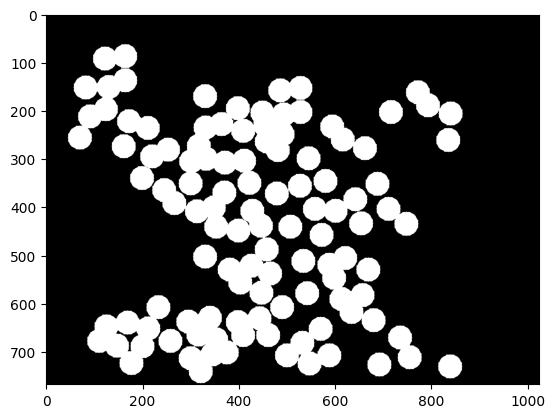

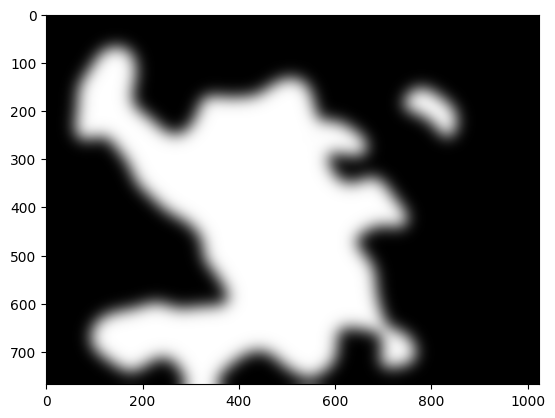

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i10_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i10.jpg


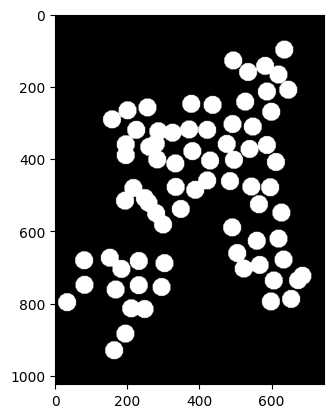

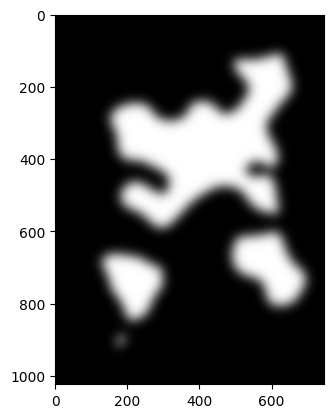

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i12_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i12.jpg


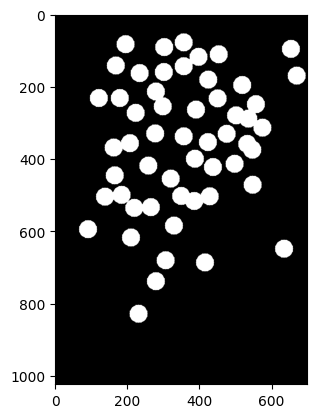

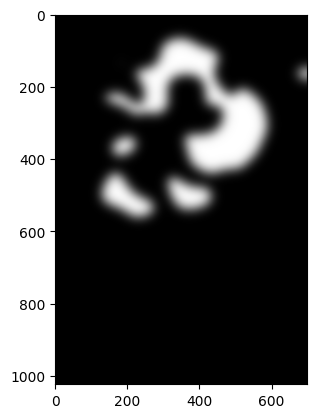

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i17_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i17.jpg


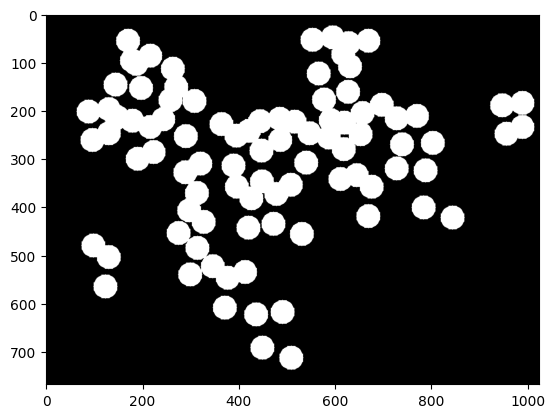

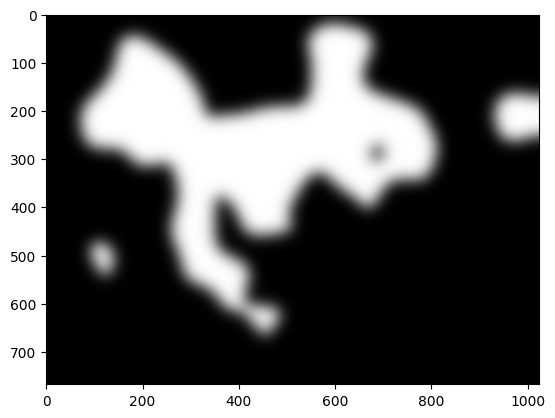

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i18_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i18.jpg


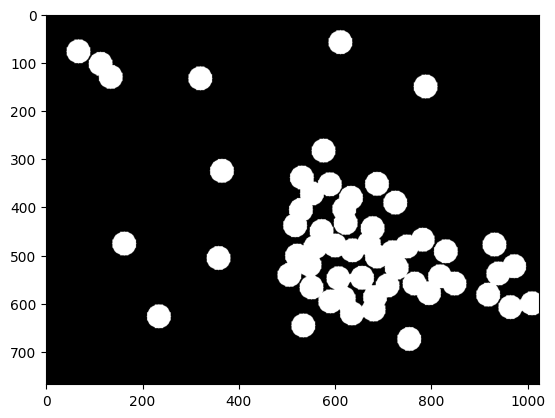

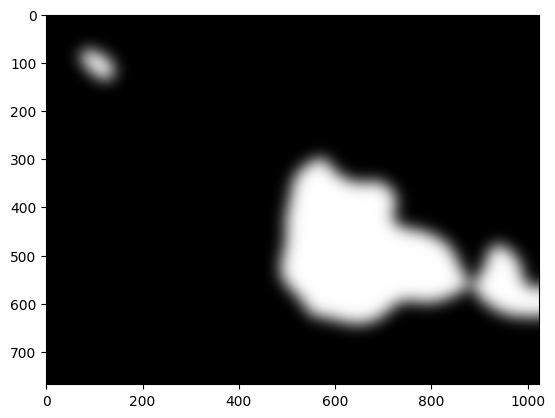

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i1_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i1.jpg


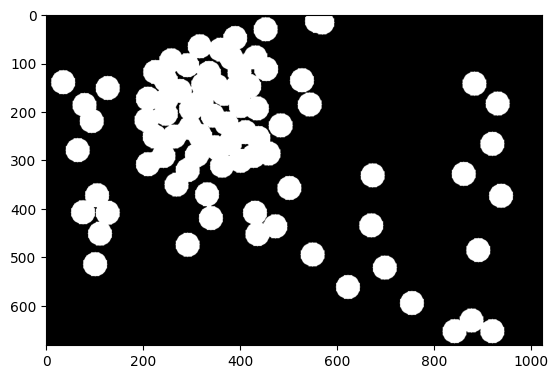

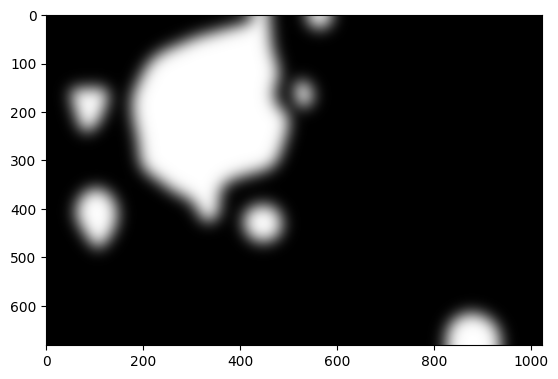

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i2_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i2.jpg


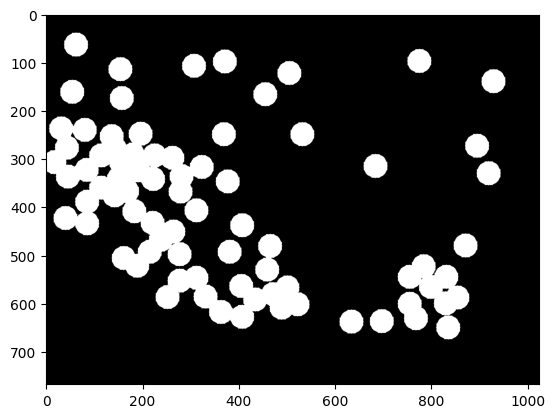

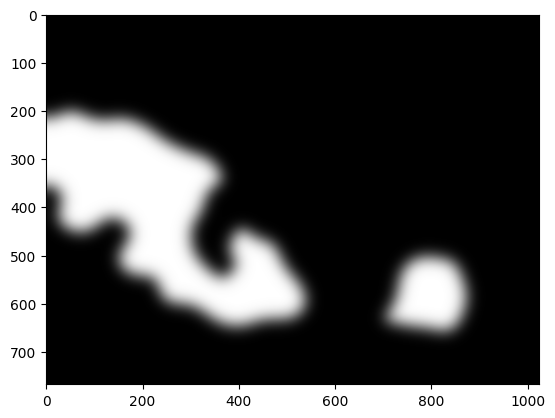

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i4_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i4.jpg


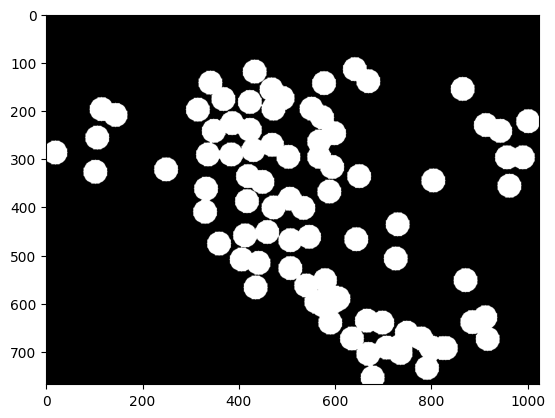

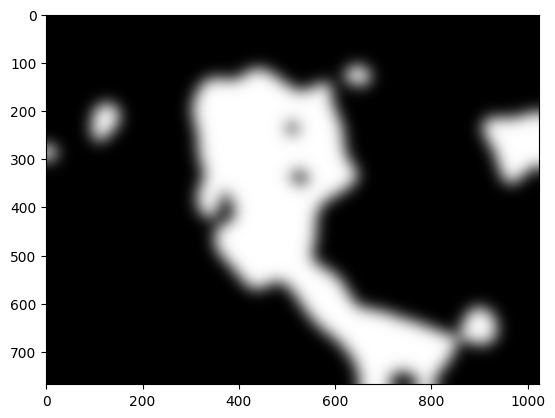

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i54_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i54.jpg


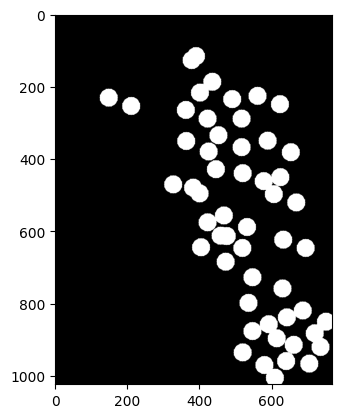

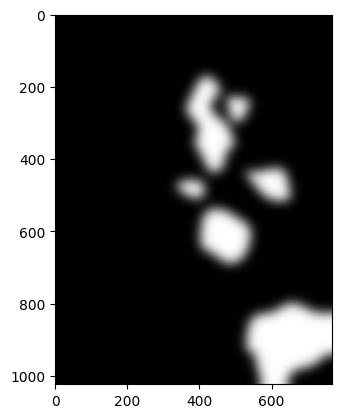

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i85_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i85.jpg


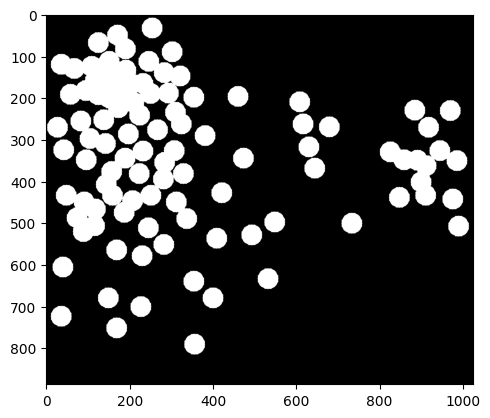

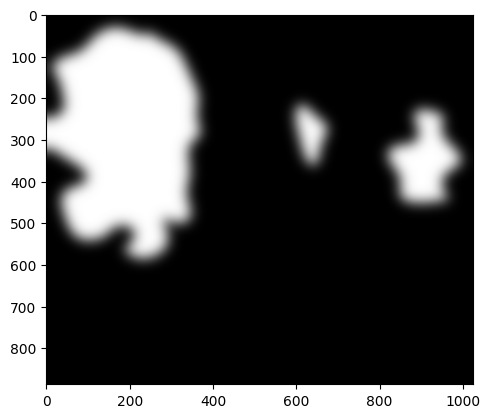

D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV\i9_coordinates.csv
D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images\i9.jpg


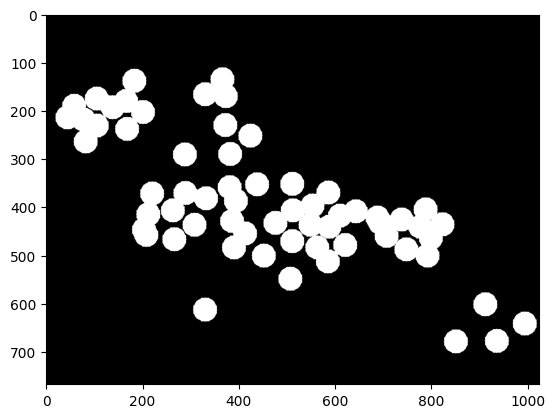

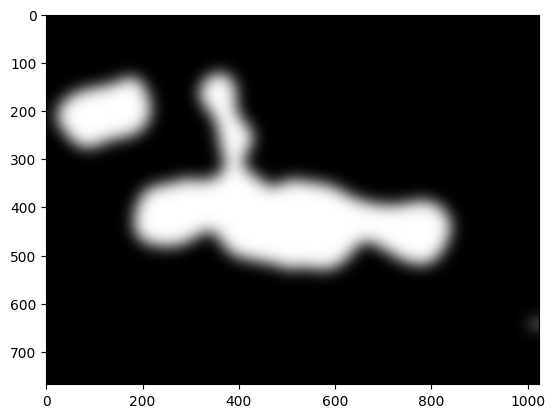

In [1]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
def convert_fixation_to_saliency(image):
     # Apply Gaussian blur
    blur_radius=201
    saliency_map = cv2.GaussianBlur(image, (blur_radius, blur_radius), 0)
    _, saliency_map = cv2.threshold(saliency_map, 100, 255, cv2.THRESH_BINARY)
    blur_radius=101
    saliency_map = cv2.GaussianBlur(saliency_map, (blur_radius, blur_radius), 0)
    return saliency_map

def plot_dots_from_csv(csv_filename, image_filename, output_folder):
    # Read Images
    image = cv2.imread(image_filename)

    # Create a black background with the same dimensions as the original image
    black_background = np.zeros_like(image)

    # Read coordinates from CSV file
    red_dot_coordinates = []
    with open(csv_filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            x, y = float(row['x']), float(row['y'])
            red_dot_coordinates.append((x, y))

    # Scale the coordinates to image size
    x_coordinates_scaled = [int(x / 3000 * image.shape[1]) for x, y in red_dot_coordinates]
    y_coordinates_scaled = [int(y / 2000 * image.shape[0]) for x, y in red_dot_coordinates]

    # Overlay red dots on the black background
    for x, y in zip(x_coordinates_scaled, y_coordinates_scaled):
        cv2.circle(black_background, (x, y), radius=5, color=(255, 255, 255), thickness=40)
        cv2.circle(image, (x, y), radius=5, color=(0, 0, 255), thickness=40)

    saliency_map=convert_fixation_to_saliency(black_background)

    # Display the black image with red dots (optional)
    plt.imshow(black_background)
    plt.show()
    plt.imshow(saliency_map)
    plt.show()

    # Create the output folder if it doesn't exist
    os.makedirs(os.path.join(output_folder,'RGB with Fixation'), exist_ok=True)
    os.makedirs(os.path.join(output_folder,'Saliency_Maps'), exist_ok=True)

    # Specify the output path for saving the black image with red dots
    plot_filename = os.path.join(output_folder,'RGB with Fixation', f'{os.path.splitext(os.path.basename(csv_filename))[0]}_red_dots.jpg')
    sal_filename = os.path.join(output_folder,'Saliency_Maps', f'{os.path.splitext(os.path.basename(image_filename))[0]}.jpg')


    # Save the image with red dots
    cv2.imwrite(plot_filename, image)

    cv2.imwrite(sal_filename, saliency_map)




def process_files(csv_folder,input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each file in the input folder
    for filename in os.listdir(csv_folder):
        # Check if the file is a CSV file
        if filename.lower().endswith('_coordinates.csv'):
            csv_filename = os.path.join(csv_folder, filename)
            print(csv_filename)

            # Construct the corresponding image filename
            # Remove the "_coordinates" substring from the filename
            image_filename = os.path.join(input_folder, f'{os.path.splitext(filename)[0].replace("_coordinates", "")}.jpg')
            print(image_filename)

            # Plot and save red dots from CSV and image
            plot_dots_from_csv(csv_filename, image_filename, output_folder)

if __name__ == "__main__":
    input_folder = 'D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Images'
    csv_folder = 'D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset/Fixation_CSV'
    output_folder = 'D:/MSEE-2K23-AIAS/Semester 1/Machine Learning/Semester Project/UNET Model IP/Custom_Dataset'

    process_files(csv_folder,input_folder, output_folder)
